In [61]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('./rideshare_kaggle.csv')
# df = df.iloc[:1000]

#### Understanding Data

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
rides_vs_price = plt.figure(figsize=(15, 10))
sd = np.std(df['price'])
mean = df['price'].mean()
size = len(df['price'].unique())
freq = {}
for data in df['price'].unique() :
    freq[data] = len(df[df.price == data])
plt.plot([mean,mean],[0,55000])
plt.plot([mean-sd,mean-sd],[0,55000],color = "green")
plt.plot([mean+sd,mean+sd],[0,55000],color = "green")
plt.title("Rides vs Price")
plt.xlabel("Price")
plt.ylabel("No. of Rides")
plt.scatter(freq.keys(),freq.values(),marker = '1',color = 'red')

In [ ]:
plt.boxplot(freq.values())


In [ ]:
df.isna().sum()

In [ ]:
col_vs_values = plt.figure(figsize=(15, 10))
col_list = ['source','destination','cab_type','product_id','name','short_summary','long_summary','icon','timezone']
unique_val = []
for data in col_list :
    unique_val += [len(pd.unique(df[data]))]
plt.barh(col_list,unique_val)
plt.title("No. of Unique Values per Column")
plt.xlabel("No. of Unique Values")
plt.ylabel("Columns")

#### Data preprocessing

In [3]:
df = df.dropna()
N = df.shape[0]

In [4]:
df.loc[df.cab_type=='Uber','product_id'] = 'Uber'
df = df.drop("id",axis="columns")
df = df.drop("timezone",axis="columns")

## From here

In [10]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

In [11]:
New_df = df[['source','destination','cab_type','distance','product_id','price']]
New_df = pd.get_dummies(New_df,columns=['source','destination','cab_type','product_id'],drop_first=True);

In [ ]:
df_with_na=pd.DataFrame()
df_with_na=df_with_na.append(New_df.iloc[rows_with_nan])

df_noNull=New_df.dropna()


In [13]:
x_noNull = df_noNull.drop("price",axis="columns")
y_noNull=df_noNull[['price']]


ml_model = linear_model.LinearRegression()
ml_model.fit(x_noNull, y_noNull)

x_with_Null = df_with_na.drop("price",axis="columns")
y_with_Null = ml_model.predict(x_with_Null)
df.loc[rows_with_nan,'price'] = y_with_Null

## To here

In [ ]:
df.columns

#### Data visualization

In [ ]:
## Month vs price
month_vs_price = plt.figure(figsize=(15, 10))
lst = []
for i in range(11,13) :
    price = df.loc[df.month==i]['price'].mean()
    lst += [price]
plt.bar(['November','December'],lst)
plt.title("Month vs Price")
plt.xlabel("Months")
plt.ylabel("Average price (in $)")

In [ ]:
## time vs average price
time_price = plt.figure(figsize=(10, 5))
lst = df['hour'].unique()
num = [0]*len(lst)
for data in lst :
    num[data] = df[df.hour==data]['price'].mean()
plt.bar(lst,num,color = "yellow")
plt.title("Time vs average price")
plt.xlabel("Time(in hr)")
plt.ylabel("Average Price(in $)")


In [ ]:
## time vs number of cabs
time_vs_cabs = plt.figure(figsize=(15, 10))
lst = df['hour'].unique()
num = [0]*24
for data in lst :
    num[data] = len(df[df.hour==data])


plt.bar(lst,num,color = "red")
plt.title("Time vs Number of Cabs")
plt.xlabel("Time (in hr)")
plt.ylabel("Number of cabs")

In [ ]:
## cab type vs price
cab_vs_price = plt.figure(figsize=(15, 10))
lst = df['cab_type'].unique()
avg_price = []
for data in lst :
    new_df = df[df.cab_type == data]
    avg_price += [new_df['price'].mean()]
plt.bar(lst,avg_price,color = "purple")
plt.title("Cab type vs Price")
plt.xlabel("Cab type")
plt.ylabel("Price")

In [ ]:
## product id vs price
prod_vs_price = plt.figure(figsize=(15, 10))
lst = df['product_id'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.product_id == data]['price'].mean()]
plt.barh(lst,avg_price,color = "orange")
plt.title("Product id vs Price")
plt.ylabel("Product id")
plt.xlabel("Price")

In [ ]:
## climate conditions vs price
climate_vs_price = plt.figure(figsize=(15, 10))
lst = df['short_summary'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.short_summary==data]['price'].mean()]
plt.barh(lst,avg_price,color = "green")
plt.title("Climate conditions vs Price")
plt.xlabel("Price")
plt.ylabel("Climate conditions")

In [ ]:
## source vs avg price
source_vs_price = plt.figure(figsize=(15, 10))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.source == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "red")
plt.title("Source vs Average price")
plt.xlabel("Average price")
plt.ylabel("Source")

In [ ]:
## destinations vs avg price
dest_vs_price = plt.figure(figsize=(15, 10))
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = df[df.destination == data]['price'].mean()
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Average price")
plt.xlabel("Average price")
plt.ylabel("Destination")

In [ ]:
## source vs number of cabs
source_vs_cabs = plt.figure(figsize=(15, 10))
lst = df['source'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.source == data])-50000
print(Dist)
plt.barh(list(Dist.keys()),list(Dist.values()),color = "black")
plt.title("Source vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Source")

In [ ]:
## destinations vs number of cabs
# figure.tight_layout(pad = 5)
dest_vs_cabs = plt.figure(figsize=(15, 10))
# figure.tight_layout(pad=5)
# figure.set_figwidth(15)
# figure.set_figheight(10)
lst = df['destination'].unique()
Dist = {}
for data in lst :
    Dist[data] = len(df[df.destination == data])-50000
plt.barh(list(Dist.keys()),Dist.values(),color = "green")
plt.title("Destination vs Number of cabs")
plt.xlabel("V ->\nNumber of cabs(V+50000)")
plt.ylabel("Destinations")


#### Data encoding

In [5]:
New_df = pd.get_dummies(df,columns=['source','destination','cab_type','product_id','name','short_summary','long_summary','icon'],drop_first=True)

#### Predicting Price

In [6]:
x = New_df.drop(['price','datetime'],axis='columns')
y = New_df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=69);

model = linear_model.LinearRegression()
model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

0.9280997154088444


In [ ]:
df.columns

In [ ]:
figure,axis = plt.subplots(1,2)
figure.tight_layout(pad = 5)
figure.set_figwidth(15)
figure.set_figheight(10)

lst = df[df.cab_type == 'Uber']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
axis[0].title.set_text('Name vs Price')
axis[1].title.set_text('Name vs Price')
axis[0].set_xlabel('Price')
axis[1].set_xlabel('Price')
axis[1].set_ylabel('Name')
axis[0].set_ylabel('Name')
# plt.title("Name vs Price")
# plt.xlabel("Price")
# plt.ylabel("Name")
axis[0].barh(lst,avg_price,color = "red")

lst = df[df.cab_type == 'Lyft']['name'].unique()
avg_price = []
for data in lst :
    avg_price += [df[df.name == data]['price'].mean()]
# plt.title("Name vs Price")
# plt.xlabel("Price")
# plt.ylabel("Name")
axis[1].barh(lst,avg_price)



In [ ]:
## removing the unwanted features 
New_df = df[['hour','day','month','source','destination','cab_type','product_id','name','price','distance','surge_multiplier','short_summary']]
New_df['hour'] = New_df['hour'].astype(str)
New_df = pd.get_dummies(New_df,columns = ['source','destination','cab_type','product_id','short_summary'],drop_first = True)
New_df = pd.get_dummies(New_df,columns = ['hour','name'],drop_first = False)
x = New_df.drop(['price'],axis = "columns")
y = New_df['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state=69)
model = linear_model.LinearRegression()

model.fit(x_train,y_train)
pred_val = model.predict(x_test)
print(r2_score(y_test,pred_val))

#### Predicting what is minimum price for a particular day

In [ ]:
## creating sample x and y
sample = New_df.sample()
sample_x = sample.drop(['price'],axis = 'columns')
sample_y = sample['price']
string = 'hour_'
actual_hr = -1
for i in range(24) :
    if 1 in sample_x[string + str(i)].unique() :
        actual_hr = i
        sample_x[string+str(i)] = 0
min_price = 1000
ans = 0
for i in range(24) :
    sample_x['hour_'+str(i)] = 1
    price = model.predict(sample_x)
    sample_x['hour_'+str(i)] = 0
    if price < min_price :
        min_price = price
        ans = i
print("Predicted Minimum price and hour")
print(min_price,ans)
print("************")
print("Actual price")
print(sample_y)
print("Actual hour")
print(actual_hr)

#### Predicting what cab should someone get at a particular a price

In [70]:
## first need to implement decision tree model to predict the name of cab
## Then use the same technique to find cab of that particular range

from sklearn.tree import DecisionTreeClassifier

df_cab=df[['day','month','hour','source','destination','price','distance','name']]
df_cab = pd.get_dummies(df_cab,columns = ['source','destination'],drop_first = True)
# x_cabPred=df.drop(['name'],axis='columns')

x_cabPred=df_cab.drop(['name'],axis='columns')
y_cabPred=df['name']
labels = df['name'].unique()

# print(x_cabPred.head())
# print(y_cabPred.head())

# df.head(
X_train, X_test, y_train, y_test = train_test_split(x_cabPred, y_cabPred, test_size = 0.3, random_state = 100)
modelTree=DecisionTreeClassifier(max_depth=25,random_state=100)
modelTree.fit(X_train,y_train)

y_pred = modelTree.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       Black       0.89      0.91      0.90     16392
   Black SUV       0.92      0.92      0.92     16513
         Lux       0.65      0.68      0.67     15333
   Lux Black       0.84      0.85      0.84     15259
Lux Black XL       0.88      0.88      0.88     15404
        Lyft       0.85      0.86      0.85     15457
     Lyft XL       0.70      0.67      0.68     15373
      Shared       0.94      0.92      0.93     15133
    UberPool       0.65      0.67      0.66     16566
       UberX       0.33      0.33      0.33     16809
      UberXL       0.83      0.82      0.82     16462
         WAV       0.33      0.31      0.32     16692

    accuracy                           0.73    191393
   macro avg       0.73      0.73      0.73    191393
weighted avg       0.73      0.73      0.73    191393



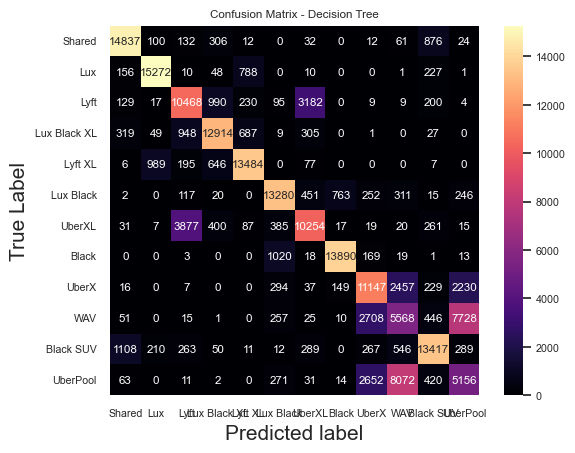

<Figure size 1500x1000 with 0 Axes>

In [105]:
c_matrix = confusion_matrix(y_test,y_pred)
matrix_df = pd.DataFrame(c_matrix)
ax = plt.axes()
fig = plt.figure(figsize=(15,10))
sns.set(font_scale=0.7)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma",square=True)#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [100]:
sampleIn=df_cab.sample()
sampleInput=sampleIn.drop(['name'],axis='columns')
# sampleIndex=x_cabPred.iloc(sampleInput)
predValue=modelTree.predict(sampleInput)

print('The predicted values is ')
print(predValue)
print('The actual values is ')
print(sampleIn['name'])

The predicted values is 
['UberPool']
The actual values is 
483169    UberPool
Name: name, dtype: object
